📷 Processing Image: /content/flower.jpeg


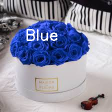

🎨 Detected Colors: Blue
📷 Processing Image: /content/plant.jpeg


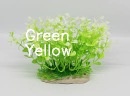

🎨 Detected Colors: Green, Yellow
📷 Processing Image: /content/raspberry.jpg


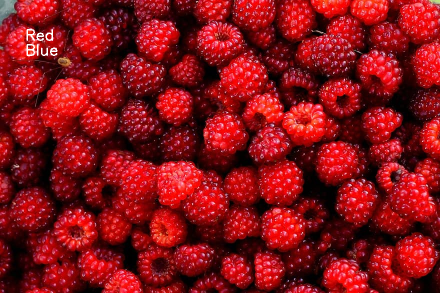

🎨 Detected Colors: Red, Blue
✅ Processing Complete.


In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # For Google Colab

# List of image paths (Modify these paths based on your actual files)
image_paths = ["/content/flower.jpeg", "/content/plant.jpeg", "/content/raspberry.jpg"]

# Define color ranges in HSV (Refined for better accuracy)
colors = {
    "Red": [([0, 120, 70], [10, 255, 255]),  # Lower Red
            ([170, 120, 70], [180, 255, 255])],  # Upper Red
    "Green": [([36, 100, 100], [86, 255, 255])],  # Standard Green
    "Blue": [([94, 80, 2], [126, 255, 255])],  # Standard Blue
    "Yellow": [([20, 100, 100], [40, 255, 255])]  # Refined Yellow Range
}

# Process each image using predefined paths
for image_path in image_paths:
    frame = cv2.imread(image_path)

    if frame is None:
        print(f"❌ Error: Image not found at {image_path}. Check the file path.")
        continue

    # Convert the image to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    detected_colors = []  # List to store detected colors

    for color, ranges in colors.items():
        for lower, upper in ranges:
            lower = np.array(lower, dtype=np.uint8)
            upper = np.array(upper, dtype=np.uint8)

            # Create a mask for the color
            mask = cv2.inRange(hsv, lower, upper)

            if cv2.countNonZero(mask) > 500:  # If enough of the color is detected
                if color not in detected_colors:
                    detected_colors.append(color)
                    cv2.putText(frame, color, (50, 50 + len(detected_colors) * 30),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    # Resize image for better display (reduce size by 50%)
    frame_resized = cv2.resize(frame, (0, 0), fx=0.5, fy=0.5)

    # Display the resized image using cv2_imshow for Google Colab
    print(f"📷 Processing Image: {image_path}")
    cv2_imshow(frame_resized)

    # Print detected colors in the terminal
    if detected_colors:
        print("🎨 Detected Colors:", ", ".join(set(detected_colors)))
    else:
        print("❌ No matching colors found.")

print("✅ Processing Complete.")
